alpha [2 0]
((0, 0, 0), (0, 0, 1))
[[  9.23035869 -32.48111279  26.0510954 ]
 [  1.           0.           0.        ]]


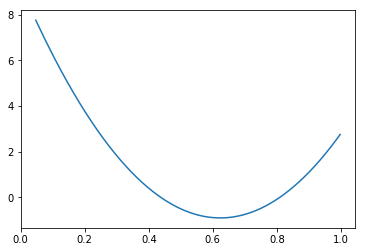

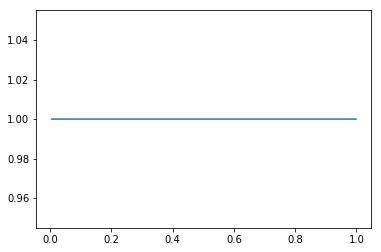

<F,G>= -7.6327832943e-17
<f,g>= -7.6327832943e-17
<f,g>= -7.6327832943e-17
<F,G>= -7.6327832943e-17
[2, 2]
(400, 2) (400, 2)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import context
import aMRPC.utils as u
import aMRPC.datatools as dt
import aMRPC.polytools as pt


# data location
url='../data/InputParameters.txt'

# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')
#data=dataframe.loc[:,0:1]
#print(data.describe())

srcs=[0,1]
No=4
Nr=2
method=0
NrRange=np.arange(Nr+1)
dim=len(srcs)

Hdict=dt.genHankel(dataframe,srcs,NrRange,No)
#print(Hdict)
# further with test004
R,W=dt.genRootsWeights(Hdict,method)
#print(R,W)
PCdict=dt.genPCs(Hdict,method)
nPCdict=dt.genNPCs(PCdict,R,W)

Alphas=u.genMultiIdx(No,dim)
aa=9
ab=10
print("alpha",Alphas[aa])

Nrs=[2, 2]
aNrs=[0, 0]
Nris=[0, 0]
#srcs=[0, 1]

mk=u.genMultiKey(aNrs,Nris,srcs)
mk[1][u.ParPos['aNr']]
print(mk)

aR,aW=dt.genRW4mkey(mk,R,W)
#aR
Cfs=dt.PCfs4eval(nPCdict,mk,Alphas[aa])
print(Cfs)
Cfsb=dt.PCfs4eval(nPCdict,mk,Alphas[ab])

xa=np.array(dataframe[srcs[0]])
xb=np.array(dataframe[srcs[1]])
xa.sort()
xb.sort()


F=lambda x:pt.PCeval(Cfs,x)
G=lambda x:pt.PCeval(Cfsb,x)

X=np.array([xa,xb]).T
#Y=pt.PCeval(Cfs,X)
Y=F(X)
plt.plot(X[:,0],Y[:,0])
plt.show()

plt.plot(X[:,1],Y[:,1])
plt.show()

fa=lambda x:pt.PCeval(Cfs[0,:],x)
fb=lambda x:pt.PCeval(Cfs[1,:],x)
f=(fa,fb)
ga=lambda x:pt.PCeval(Cfsb[0,:],x)
gb=lambda x:pt.PCeval(Cfsb[1,:],x)
g=(ga,gb)

q=dt.innerProdFct(F,G,aR,aW)
print("<F,G>=",q)
qa=dt.innerProdArr(f,g,aR,aW)
print("<f,g>=",qa)
qmt=dt.innerProdMultiIdx(f,g,mk,R,W)
print("<f,g>=",qmt)
qmf=dt.innerProdMultiIdx(F,G,mk,R,W)
print("<F,G>=",qmf)

#a=np.array([])
#b=np.zeros(3)
#c=np.concatenate((a,b),axis=0)
#c=np.reshape(c,(-1,3))
#print(c)
#d=np.concatenate((c,[[1,5,3],[2,7,8]]),axis=0)
#np.append([5,6,7],a)
#print(d)

#print(R,W)
oR,oW=dt.getRW4Nrs(Nrs,srcs,R,W)
print(Nrs)
#print(oR,'\n\n',oW)
print(oR.shape,oW.shape)